<a href="https://colab.research.google.com/github/monarkparekh/MAE-598__Design-Optimization/blob/Assignment-3/MAE_598__Design_Optimization_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>MAE 598 Design Optimization: 
Assignment 3</h1></b>

Name: Monark Parekh <br> 
ASU ID: 1222179426


<h2><b> Question 1 <b></h2>

Importing the required libraries

In [ ]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
#import math
from tabulate import tabulate
from sympy import exp


Defining the p1 and p2 saturation values

In [ ]:
T = 20
a1, a2, a3 = 8.07131, 1730.63, 233.426
p1_sat = 10**(a1 - (a2/(T + a3)))
a1, a2, a3 = 7.43155 , 1554.679, 240.337
p2_sat = 10**(a1 - (a2/(T + a3)))

Defining the given data

In [ ]:
data = [['x1','p'],[0,28.1], [0.1,34.4], [0.2,36.7], [0.3,36.9], [0.4,36.8], [0.5,36.7], [0.6,36.5], [0.7,35.4], [0.8,32.9], [0.9,27.7], [1,17.5]]
print(tabulate(data, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤══════╕
│   x1 │    p │
╞══════╪══════╡
│  0   │ 28.1 │
├──────┼──────┤
│  0.1 │ 34.4 │
├──────┼──────┤
│  0.2 │ 36.7 │
├──────┼──────┤
│  0.3 │ 36.9 │
├──────┼──────┤
│  0.4 │ 36.8 │
├──────┼──────┤
│  0.5 │ 36.7 │
├──────┼──────┤
│  0.6 │ 36.5 │
├──────┼──────┤
│  0.7 │ 35.4 │
├──────┼──────┤
│  0.8 │ 32.9 │
├──────┼──────┤
│  0.9 │ 27.7 │
├──────┼──────┤
│  1   │ 17.5 │
╘══════╧══════╛


Determining the Gradient and Hessian of the given pressure function

In [ ]:
A12, A21, x1, x2 = symbols('A12 A21 x1 x2', real=True)
f = (x1 * exp(A12 * ((A21*x2/(A12*x1 + A21*x2))**2)) * p1_sat) + (x2 * exp(A21 * ((A12*x1/(A12*x1 + A21*x2))**2)) * p2_sat)
grad = [0,0]
grad[0] = diff(f, A12)
grad[1] = diff(f, A21)
print(f'G1 = {grad[0]}\nG2 = {grad[1]}')
H1 = diff(grad[0], A12)
H2 = diff(grad[0], A21)
H3 = diff(grad[1], A12)
H4 = diff(grad[1], A21)
Hess = np.array([[H1,H2],[H3,H4]])
print(f'\nH1 = {H1}\nH2 = {H2}\nH3 = {H3}\nH4 = {H4}')
symbolsToDelete = ('A12', 'A21', 'x1', 'x2')
for z0 in symbolsToDelete:
    del globals()[z0]

G1 = 17.4732520845971*x1*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
G2 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)

H1 = 17.4732520845971*x1*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)**2*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 17.4732520845971*x1*(6*A12*A21**2*x1**2*x2**2/(A12*x1 + A21*x2)**4 - 4*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2

Defining the given pressure function 'p'

In [ ]:
def p(x1, A12, A21):
  x2 = 1 - x1
  T1 = x1 * math.exp(A12 * ((A21*x2/(A12*x1 + A21*x2))**2)) * p1_sat
  T2 = x2 * math.exp(A21 * ((A12*x1/(A12*x1 + A21*x2))**2)) * p2_sat
  function_value_p = T1 + T2
  G1 = 17.4732520845971*x1*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2) 
  G2 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
  gradient = np.array([[G1, G2],])

  H1 = 17.4732520845971*x1*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)**2*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 17.4732520845971*x1*(6*A12*A21**2*x1**2*x2**2/(A12*x1 + A21*x2)**4 - 4*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)**2*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(6*A12**2*A21*x1**4/(A12*x1 + A21*x2)**4 - 8*A12*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A21*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
  H2 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 17.4732520845971*x1*(6*A12*A21**2*x1*x2**3/(A12*x1 + A21*x2)**4 - 4*A12*A21*x1*x2**2/(A12*x1 + A21*x2)**3 - 2*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A21*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(6*A12**2*A21*x1**3*x2/(A12*x1 + A21*x2)**4 - 2*A12**2*x1**3/(A12*x1 + A21*x2)**3 - 4*A12*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + 2*A12*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
  H3 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 17.4732520845971*x1*(6*A12*A21**2*x1*x2**3/(A12*x1 + A21*x2)**4 - 4*A12*A21*x1*x2**2/(A12*x1 + A21*x2)**3 - 2*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A21*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(6*A12**2*A21*x1**3*x2/(A12*x1 + A21*x2)**4 - 2*A12**2*x1**3/(A12*x1 + A21*x2)**3 - 4*A12*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + 2*A12*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
  H4 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)**2*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 17.4732520845971*x1*(6*A12*A21**2*x2**4/(A12*x1 + A21*x2)**4 - 8*A12*A21*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)**2*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(6*A12**2*A21*x1**2*x2**2/(A12*x1 + A21*x2)**4 - 4*A12**2*x1**2*x2/(A12*x1 + A21*x2)**3)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
  Hessian = np.array([[H1,H2],[H3,H4]])
  return function_value_p, gradient, Hessian

Defining the given Objective Function

In [ ]:
def objective_function(data, A12, A21):
  objective_value = 0
  objective_gradient = 0
  objective_Hessian = 0
  for i in range(1,12):
    temp1,temp2,temp3 = p(data[i][0],A12, A21)
    objective_value = objective_value + ((temp1 - data[i][1])**2)
    objective_gradient = objective_gradient + (2*(temp1 - data[i][1])*(temp2))
    objective_Hessian = objective_Hessian + 2*((np.matmul(np.transpose(temp2),temp2))+((temp1 - data[i][1]) * temp3))
  return objective_value, objective_gradient, objective_Hessian

In [ ]:
p(0.1, -1757.841696955014, -1733.8957533443263)


(4.962380492166244e-07,
 array([[9.01822862228956e-9, -4.05644065544249e-9]], dtype=object),
 array([[1.60317891288977e-10, -7.00970407612368e-11],
        [-7.00970407612368e-11, 2.94874640521065e-11]], dtype=object))

# <b>Newton's Algorithm</b>

In [ ]:
def newtonsalgorithm(x0,maximum_iteration):
  epsilon = (10)**-6
  A = []
  error_values = []
  gradient_normal = []
  A.append(x0)
  for k in range(0,maximum_iteration):
      obj_p, gradient, Hessian = objective_function(data,A[k][0],A[k][1])
      gradient_normal.append(np.linalg.norm(gradient.astype(float)))
      error_values.append(obj_p)
      if gradient_normal[k] <= epsilon:
        print(f'\nThe Newtons Algorithm has converged to a point in {k} iterations\n')
        print(f'Current Gradient Normal is {gradient_normal[k]}\n[A12, A21] = {A[k]}')
        return A,gradient_normal,(k),error_values
      
      new_A = A[k] - np.matmul(gradient.astype(float),np.linalg.inv(Hessian.astype(float)))
      A.append([new_A[0][0],new_A[0][1]])
      print(gradient_normal)
      if k == (maximum_iteration - 1):
        print(f"Number of iterations has exceeded the maxinimum iterations, still not converged to the given threshold.\nCurrent Gradient Normal is {gradient_normal[k]}\nCurrent point is {A[k]}")
        return A,gradient_normal,(k),error_values

In [ ]:
x0 = np.array([-1,-1])
maximum_iteration = 100
A,gradient_normal,(k),error_values = newtonsalgorithm(x0,maximum_iteration)
print(error_values[k])

[635.2415501816857]
[635.2415501816857, 190.71720831394126]
[635.2415501816857, 190.71720831394126, 86.37441579078221]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984, 18.480849018283713]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984, 18.480849018283713, 8.815663235758548]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984, 18.480849018283713, 8.815663235758548, 3.874378403698821]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984, 18.480849018283713, 8.815663235758548, 3.874378403698821, 1.5922568122556755]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984, 18.480849018283713, 8.815663235758548, 3.874378403698821, 1.5922568122556755, 0.5679324160572438]
[635.2415501816857, 190.71720831394126, 86.37441579078221, 39.807419990859984, 18.480849018283713, 8.8156632357585

In [ ]:
print(error_values)

[2228.273839100205, 6302.516833726246, 7680.66952108562, 8670.041445200131, 9416.455907277861, 9996.494722500182, 10471.827828761301, 10790.931460222278, 10947.37809548875, 10999.394071860375, 11017.952957354264, 11024.710481666789, 11027.186738972292, 11028.09622435146, 11028.430556584415, 11028.55350375978, 11028.598723617575, 11028.61535675798, 11028.621475159674, 11028.623725835214, 11028.624553767946, 11028.624858334515, 11028.6249703745]


<h2><b> Question 2 <b></h2>

In [25]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=b3baeb88742ac2bf809c4e9782dabaf836696f6397508e339182245920d8d295
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


Importing the required libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
from bayes_opt import BayesianOptimization

Defining the Objective function

In [36]:
def objective_function(x1, x2):
  # The Function is multiplied with "-" because the Bayesian Optimization solver can only maximize the function
  return -(((4 - 2.1*(x1**2) + ((x1**4)/3))*(x1**2)) + (x1*x2) + ((-4 + 4*(x2**2))*(x2**2)))

Defining the Bounds and the Bayesian Optimization Function

In [37]:
pbounds = {'x1':(-3,3),'x2':(-2,2)}
optimizer = BayesianOptimization(f = objective_function, pbounds = pbounds, random_state = 1,)

Determining the minimum value using Bayesian Optimization

In [38]:
optimizer.maximize(init_points = 10,n_iter = 100)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -26.91    | -2.119    | -1.631    |
|  4        | -2.856    | -1.882    | -0.6178   |
|  5        | -1.054    | -0.6194   |  0.1553   |
|  6        |  0.5211   | -0.4848   |  0.7409   |
|  7        | -11.28    | -1.773    |  1.512    |
|  8        | -66.76    | -2.836    |  0.6819   |
|  9        | -0.5377   | -0.4962   |  0.2348   |
|  10       | -12.02    | -2.158    | -1.208    |
|  11       | -6.707    | -0.6913   | -1.287    |
|  12       | -4.507    |  1.223    |  1.081    |
|  13       | -0.5198   |  1.354    | -0.6292   |
|  14       | -65.32    |  2.812    |  0.1161   |
|  15       | -48.23    |  1.016    | -2.0      |
|  16       | -49.11    |  0.3388   |  2.0      |
|  17       | -1.532    |  0.7023   |  0.103    |
|  18       | -68.92    |  2.385    |  2.0      |


In [54]:
result = optimizer.max
target_value = result['target']
minimum_x = result['params']
print(f'The Objective Function reaches the minimum value of {target_value} at {minimum_x}')

The Objective Function reaches the minimum value of 1.0315328891000553 at {'x1': 0.08506691846494913, 'x2': -0.7133078530616515}


In [58]:
x1_min = minimum_x['x1']
x2_min = minimum_x['x2']

<Figure size 432x288 with 0 Axes>

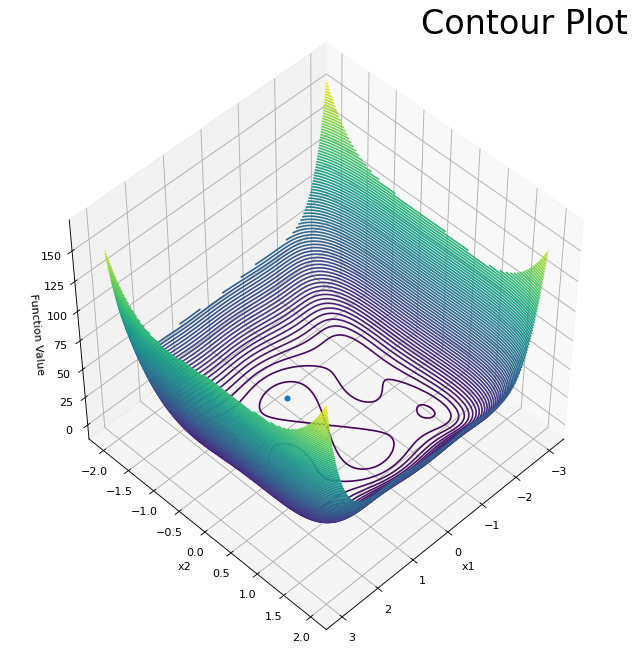

In [61]:
x1_plot = np.linspace(-3, 3, num=100)
x2_plot = np.linspace(-2, 2, num=100)
X1, X2 = np.meshgrid(x1_plot, x2_plot)
Z = -1*objective_function(X1, X2)
fig = plt.figure()
figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 100)
ax.scatter(x1_min, x2_min, target_value)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Function Value');
ax.set_title('Contour Plot',fontsize=30,color="black",loc = "right")
ax.view_init(50, 45)